In [27]:
# Final Project for Python ( Aditi Soni, Pat Gall, Sayyed Sajjad Ali)

In [28]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

In [31]:
# Loading the dataset
# Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

dataset = pd.read_csv('/content/drive/My Drive/data.csv')
print ("Dataset Length:", len(dataset))
print ("Dataset Shape:", dataset.shape)
dataset.head(3)

Dataset Length: 569
Dataset Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns
data_cleaned = dataset.drop(['id', 'Unnamed: 32'], axis=1)

# Encode target variable
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'B': 0, 'M': 1})

# Separate features and target
X = data_cleaned.drop('diagnosis', axis=1)
y = data_cleaned['diagnosis']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

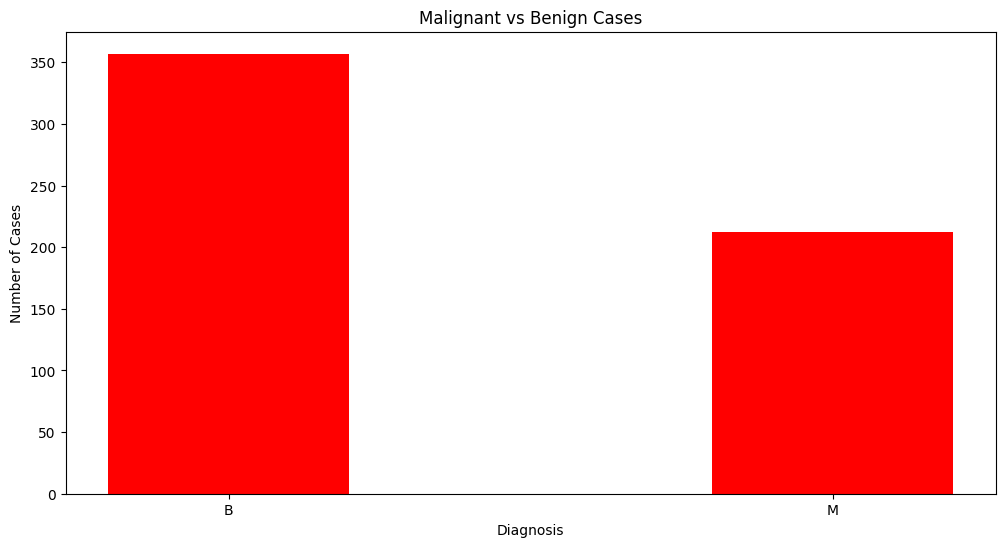

In [33]:
# Count the number of cases for each diagnosis
counts = dataset["diagnosis"].value_counts()

# Create the bar plot
plt.rcParams["figure.figsize"] = (12, 6)
plt.title("Malignant vs Benign Cases")
plt.bar(counts.index, counts.values, color='red', width=0.4)
plt.xlabel("Diagnosis")
plt.ylabel("Number of Cases")
plt.show()

<ipython-input-34-1e1ee8195992>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=data_cleaned, palette='Set2')
<ipython-input-34-1e1ee8195992>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=data_cleaned, palette='Set2')
<ipython-input-34-1e1ee8195992>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=data_cleaned, palette='Set2')
<ipython-input-34-1e1ee8195992>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

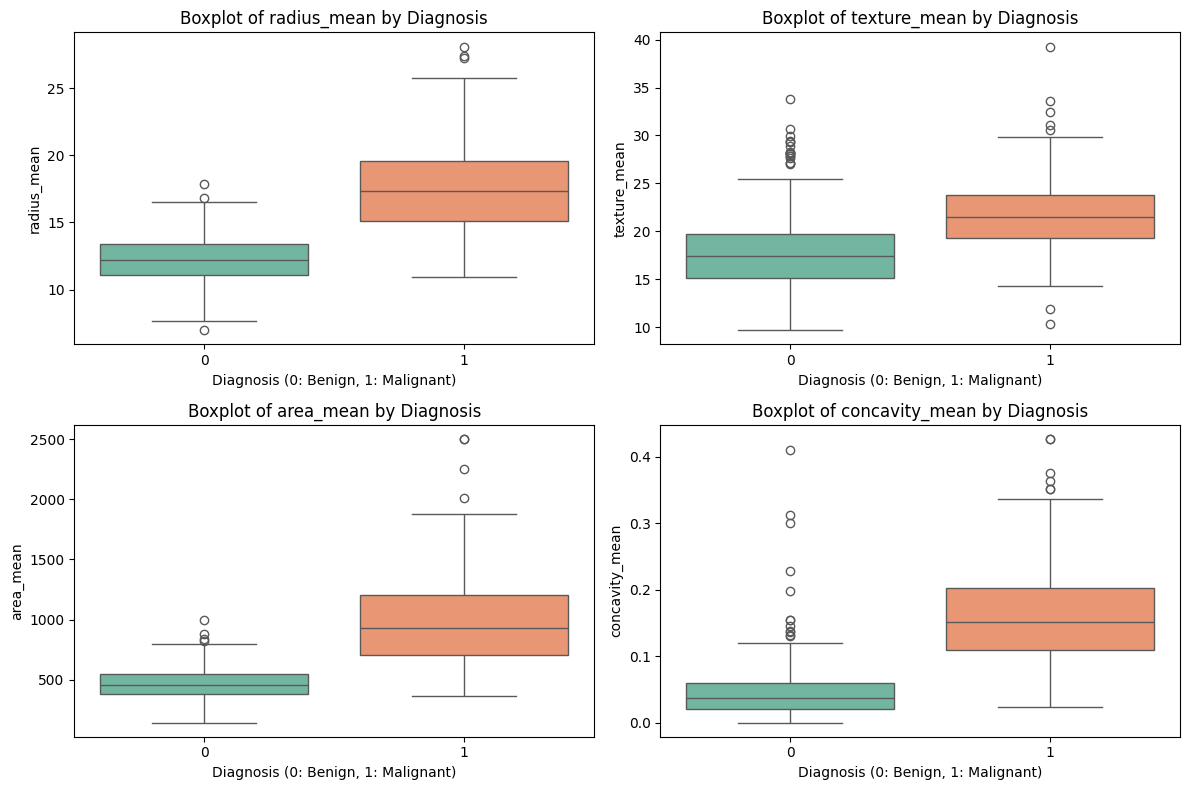

In [34]:


# Features to visualize
features_to_plot = ['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean']

# Creating boxplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=feature, data=data_cleaned, palette='Set2')
    plt.title(f"Boxplot of {feature} by Diagnosis")
    plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


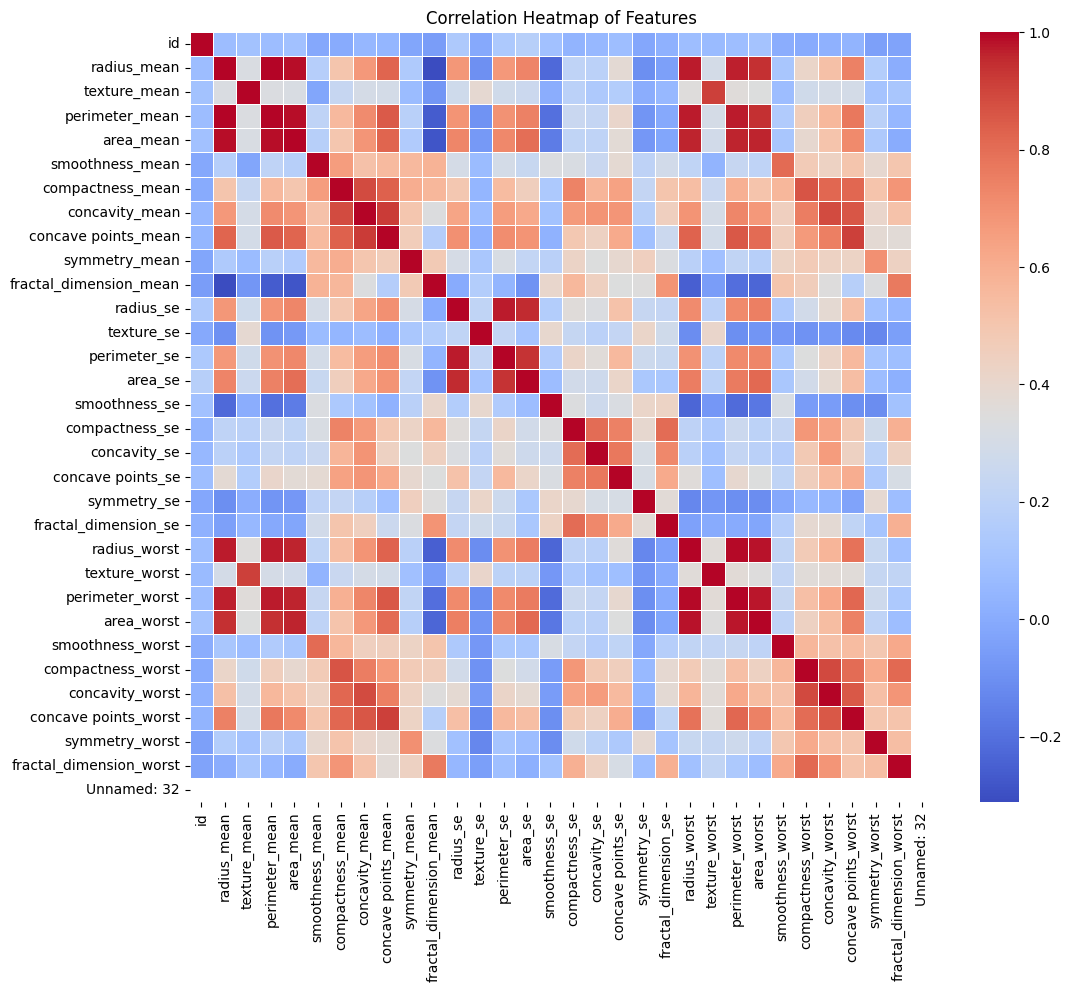

In [35]:
#creating correlation matrix along with feature selection
import seaborn as sns

# Select only numeric columns
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


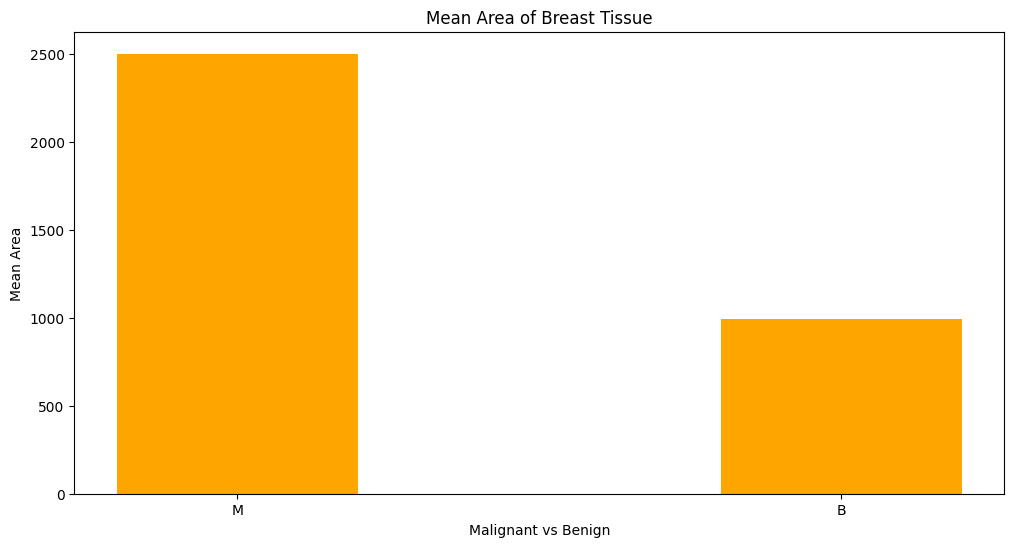

In [36]:
plt.rcParams["figure.figsize"] = (12,6)

# Bar Chart 1-D
x = dataset["diagnosis"]
plt.title("Mean Area of Breast Tissue")
plt.bar(x, dataset["area_mean"], color ='orange', width = 0.4)
plt.xlabel("Malignant vs Benign")
plt.ylabel("Mean Area")
plt.show()

In [37]:
data_cleaned.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


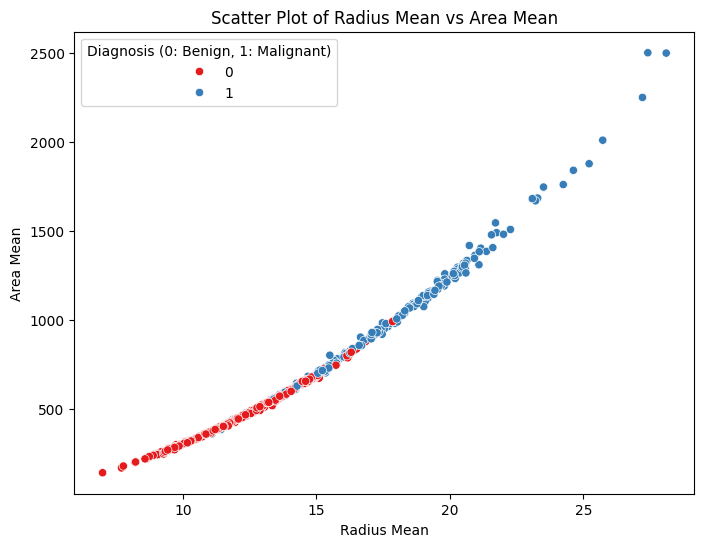

In [38]:
# Scatter plot of two features, colored by diagnosis
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='radius_mean',
    y='area_mean',
    hue='diagnosis',
    palette='Set1',
    data=data_cleaned
)
plt.title('Scatter Plot of Radius Mean vs Area Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.legend(title='Diagnosis (0: Benign, 1: Malignant)')
plt.show()


diagnosis
B    357
M    212
Name: count, dtype: int64
diagnosis
B    357
M    212
Name: count, dtype: int64


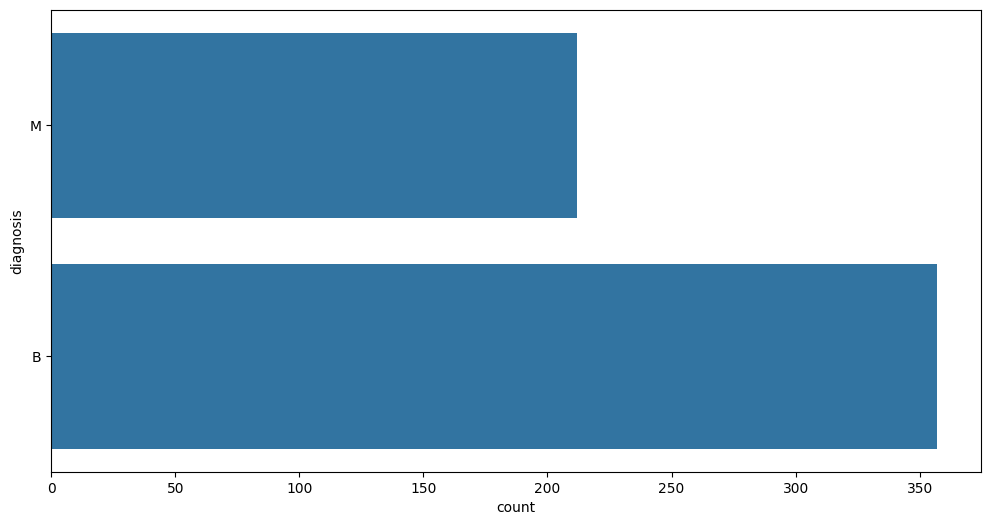

In [39]:
#frequency of cancer stages
import seaborn as sns
import matplotlib as plt

sns.countplot(dataset['diagnosis'],label = "count")
B = dataset['diagnosis'].value_counts()
print(B)

M = dataset['diagnosis'].value_counts()
print(M)

In [40]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
dataset[features] = scaler.fit_transform(dataset[features])

# Display processed data
dataset.head(10)
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,569.000000,569.000000,5.690000e+02,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,6.868164e-17,-1.248757e-16,654.889104,-8.366672e-16,1.873136e-16,0.088799,0.048919,1.748260e-16,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,1.000880e+00,1.000880e+00,351.914129,1.000880e+00,1.000880e+00,0.079720,0.038803,1.000880e+00,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,-2.229249e+00,-1.984504e+00,143.500000,-3.112085e+00,-1.610136e+00,0.000000,0.000000,-2.744117e+00,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,-7.259631e-01,-6.919555e-01,420.300000,-7.109628e-01,-7.470860e-01,0.029560,0.020310,-7.032397e-01,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,-1.046362e-01,-2.359800e-01,551.100000,-3.489108e-02,-2.219405e-01,0.061540,0.033500,-7.162650e-02,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,5.841756e-01,4.996769e-01,782.700000,6.361990e-01,4.938569e-01,0.130700,0.074000,5.307792e-01,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,4.651889e+00,3.976130e+00,2501.000000,4.770911e+00,4.568425e+00,0.426800,0.201200,4.484751e+00,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [41]:
# #splitting the datatset into training and testing
# train_dataset = train_test_split(dataset, train_size= 0.8, random_state = 100)
# test_dataset = train_test_split(dataset, test_size= 0.2, random_state = 100)
import matplotlib.pyplot as plt

X = data_cleaned.drop('diagnosis', axis = 1)
y = data_cleaned['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#step 3 : Train Decision Tree classifier and Naive Bayes classifier
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

#step 4 : Make Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

#step 5 : Evaluating the model
def evaluate_model (y_test, y_pred, model_name):
  accuracy = accuracy_score (y_test, y_pred)
  print ("Accuracy: {:.2f}%".format (accuracy*100))

  report = classification_report (y_test, y_test)
  print ("Classification Report:\n", report)

  conf_matrix = confusion_matrix (y_test, y_pred)
  plt.figure(figsize = (8,6))
  sns.heatmap (conf_matrix, annot = True, fmt='d', cmap = 'Blues', xticklabels = ['Malignant', 'Benign'], yticklabels = ['Malignant', 'Benign'])
  plt.xlabel ("Predicted Labels")
  plt.ylabel ("True Labels")
  plt.title ("Confusion Matrix for %s"%(model_name))
  plt.show ()


Accuracy: 94.74%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



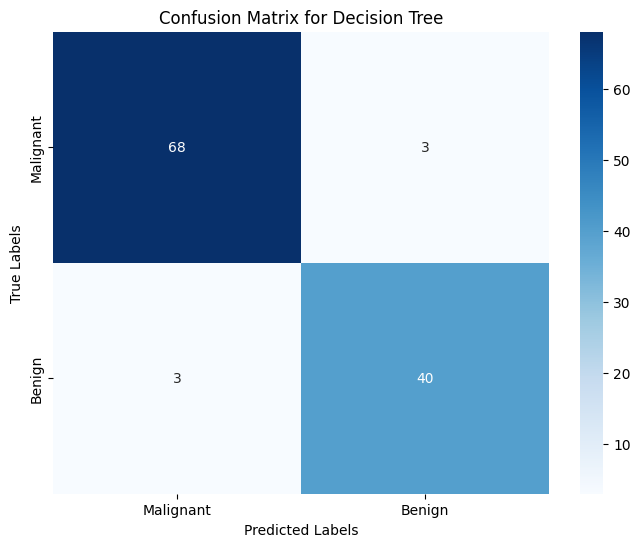

In [42]:
#evaluating model accuracy using Decison Tree
evaluate_model (y_test, y_pred_dt, 'Decision Tree')

Accuracy: 96.49%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



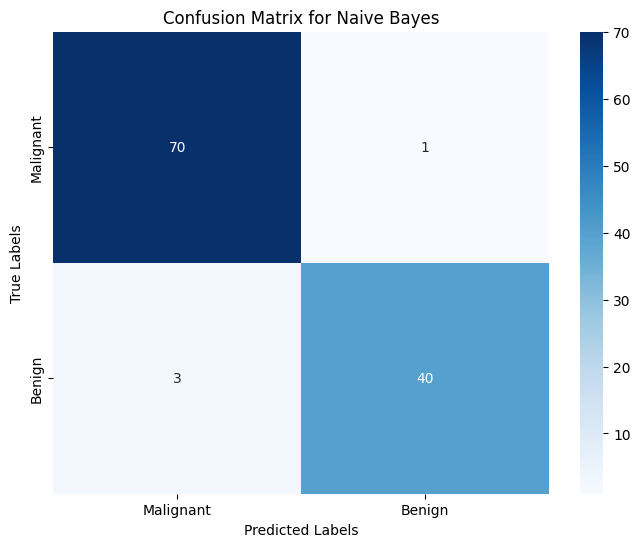

In [43]:
#evaluating model accuracy using Naive Bayes
evaluate_model(y_test, y_pred_nb, 'Naive Bayes')

In [44]:
#kfold cross validation
def kfold_cross_validation(model, model_name, X, y, k):
    kf = KFold(n_splits=k, shuffle=True)

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Calculate the average scores\
    average_accuracy = np.mean(accuracy_scores)
    average_precision = np.mean(precision_scores)
    average_recall = np.mean(recall_scores)
    average_f1 = np.mean(f1_scores)

    print("K Fold cross validation report for %s"%(model_name))
    print("Average Accuracy: {:.2f}%".format(average_accuracy * 100))
    print("Average Precision: {:.2f}%".format(average_precision* 100))
    print("Average Recall: {:.2f}%".format(average_recall * 100))
    print("Average F1 Score: {:.2f}%".format(average_f1 * 100))

In [45]:
kfold_cross_validation(dt_model, 'Decision Tree', X, y, 10)

K Fold cross validation report for Decision Tree
Average Accuracy: 93.33%
Average Precision: 91.26%
Average Recall: 90.43%
Average F1 Score: 90.54%


In [46]:
kfold_cross_validation(nb_model, 'Naive Bayes', X, y, 10)

K Fold cross validation report for Naive Bayes
Average Accuracy: 94.02%
Average Precision: 94.46%
Average Recall: 89.32%
Average F1 Score: 91.58%
